In [8]:
!pip install prophet

     |████████████████████████████████| 65 kB 2.5 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6638688 sha256=305fa2424a1cff1b46afe618dc92898061a000b0b5fe985c41f0afcff761bbb2
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [9]:
import pandas as pd
from prophet import Prophet

In [49]:
df=pd.read_csv("/content/drive/MyDrive/Time Series/Daily VU 2021.csv")

In [76]:
df_wemfr=df[df['community']=="WEM_FR"]
df_wemfr.columns=['Community','ds','y']
df_wemfr.drop(['Community'],axis=1,inplace=True)
df_wemfr['floor']=0
df_wemfr['cap']=5000
df_wemfr

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

,ds,y,floor,cap
2,2021-01-01 00:00:00,113,0,5000
16,2021-01-02 00:00:00,568,0,5000
39,2021-01-03 00:00:00,183,0,5000
52,2021-01-04 00:00:00,2840,0,5000
77,2021-01-05 00:00:00,2878,0,5000
...,...,...,...,...
8259,2021-12-27 00:00:00,2582,0,5000
8284,2021-12-28 00:00:00,2720,0,5000
8301,2021-12-29 00:00:00,2646,0,5000
8327,2021-12-30 00:00:00,2725,0,5000


In [77]:
m= Prophet(growth='logistic')
m.fit(df_wemfr)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [78]:
future = m.make_future_dataframe(periods=183,include_history=False)
future['floor'] = 0
future['cap'] = 5000
future

,ds,floor,cap
0,2022-01-01,0,5000
1,2022-01-02,0,5000
2,2022-01-03,0,5000
3,2022-01-04,0,5000
4,2022-01-05,0,5000
...,...,...,...
178,2022-06-28,0,5000
179,2022-06-29,0,5000
180,2022-06-30,0,5000
181,2022-07-01,0,5000


In [79]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2022-01-01,1101.446555,377.728404,1857.242945
1,2022-01-02,302.330741,-437.357239,1078.635822
2,2022-01-03,3162.203558,2355.485088,3879.794807
3,2022-01-04,3581.946193,2811.744695,4320.343914
4,2022-01-05,3246.080866,2474.341023,3941.651816
...,...,...,...,...
178,2022-06-28,3607.276389,2848.118978,4389.045232
179,2022-06-29,3271.410984,2503.707260,4001.752609
180,2022-06-30,3342.426341,2579.415390,4138.744324
181,2022-07-01,3192.620195,2361.971963,3943.960559


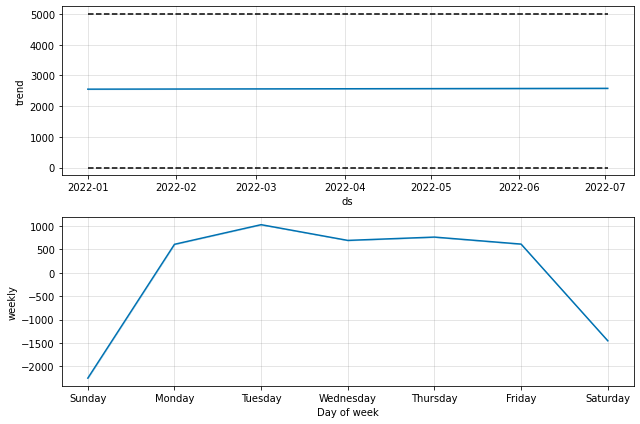

In [80]:
fig1 = m.plot_components(forecast)


(737942.0, 738244.0)

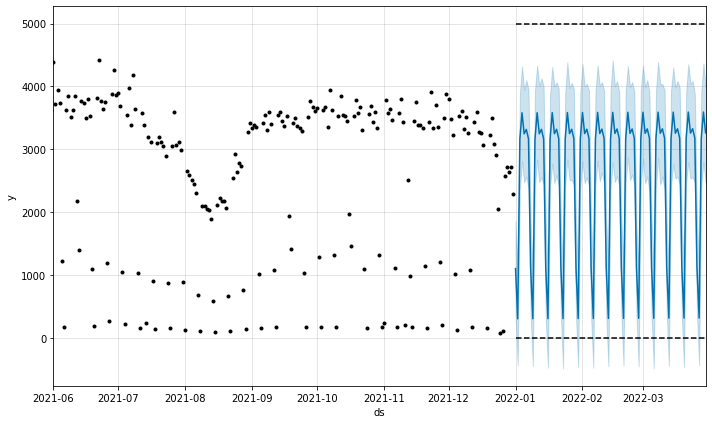

In [84]:
fig = m.plot(forecast)
ax = fig.gca()
# setting x limit. date range to plot
ax.set_xlim(pd.to_datetime(['2021-06-01', '2022-03-30'])) 
# we can ignore the shadow part by setting y limit



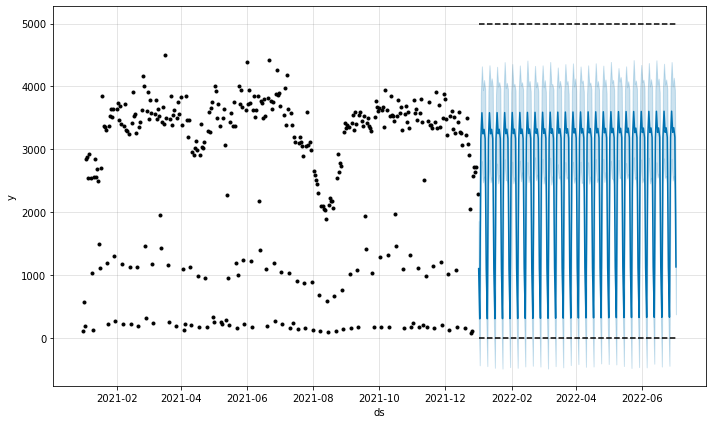

In [82]:
fig3= m.plot(forecast[forecast['ds']>='2022-01-01'])


In [83]:
forecast[forecast['ds']>='2022-01-01']

,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,2553.622007,5000,0,377.728404,1857.242945,2553.622007,2553.622007,-1452.175452,-1452.175452,-1452.175452,-1452.175452,-1452.175452,-1452.175452,0.0,0.0,0.0,1101.446555
1,2022-01-02,2553.766789,5000,0,-437.357239,1078.635822,2553.766789,2553.766789,-2251.436048,-2251.436048,-2251.436048,-2251.436048,-2251.436048,-2251.436048,0.0,0.0,0.0,302.330741
2,2022-01-03,2553.911570,5000,0,2355.485088,3879.794807,2553.911570,2553.911570,608.291988,608.291988,608.291988,608.291988,608.291988,608.291988,0.0,0.0,0.0,3162.203558
3,2022-01-04,2554.056351,5000,0,2811.744695,4320.343914,2554.056344,2554.056360,1027.889842,1027.889842,1027.889842,1027.889842,1027.889842,1027.889842,0.0,0.0,0.0,3581.946193
4,2022-01-05,2554.201131,5000,0,2474.341023,3941.651816,2554.201079,2554.201181,691.879735,691.879735,691.879735,691.879735,691.879735,691.879735,0.0,0.0,0.0,3246.080866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,2022-06-28,2579.386547,5000,0,2848.118978,4389.045232,2579.334406,2579.437909,1027.889842,1027.889842,1027.889842,1027.889842,1027.889842,1027.889842,0.0,0.0,0.0,3607.276389
179,2022-06-29,2579.531249,5000,0,2503.707260,4001.752609,2579.478643,2579.583036,691.879735,691.879735,691.879735,691.879735,691.879735,691.879735,0.0,0.0,0.0,3271.410984
180,2022-06-30,2579.675950,5000,0,2579.415390,4138.744324,2579.622718,2579.728302,762.750391,762.750391,762.750391,762.750391,762.750391,762.750391,0.0,0.0,0.0,3342.426341
181,2022-07-01,2579.820651,5000,0,2361.971963,3943.960559,2579.767288,2579.873449,612.799544,612.799544,612.799544,612.799544,612.799544,612.799544,0.0,0.0,0.0,3192.620195
